In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.patches as patches


1. Нарисуйте неправильный многоугольник (не треугольник, не квадрат) задав коорди
наты его вершин массивом NumPy.
2. С помощью матрицы для двумерных вращений
𝑅(𝜃) = (
cos 𝜃
sin 𝜃
− sin 𝜃
cos 𝜃
)
поверните данный многоугольник на любой произвольный угол вокруг начала ко
ординат.
3. Создайте ползунок, который будет вращать ваш многоугольник против часовой стрелки
с шагом 1
°
.
4. Реализуйте теперь поворот многоугольника вокруг произвольной точки на плоскости.
Точку, вокруг которой делается поворот нужно отобразить на рисунке.
5. Чтобы проверить корректность программы следует убедиться, что вершины много
угольника описывают круговые траектории при их движении. Для этого постройте
несколько вспомогательных окружностей или дуг окружностей. Центры окружностей
должны лежать в точке, относительно которой осуществляется вращение, а радиусы
должны быть равны расстоянию от центра до соответствующей вершины многоуголь
ника. Если все сделано правильно, то будет видно, как многоугольник при вращении
скользит своими вершинами по построенным окружностям. Как рисовать дуги окруж
ности см. Раздел 3.5

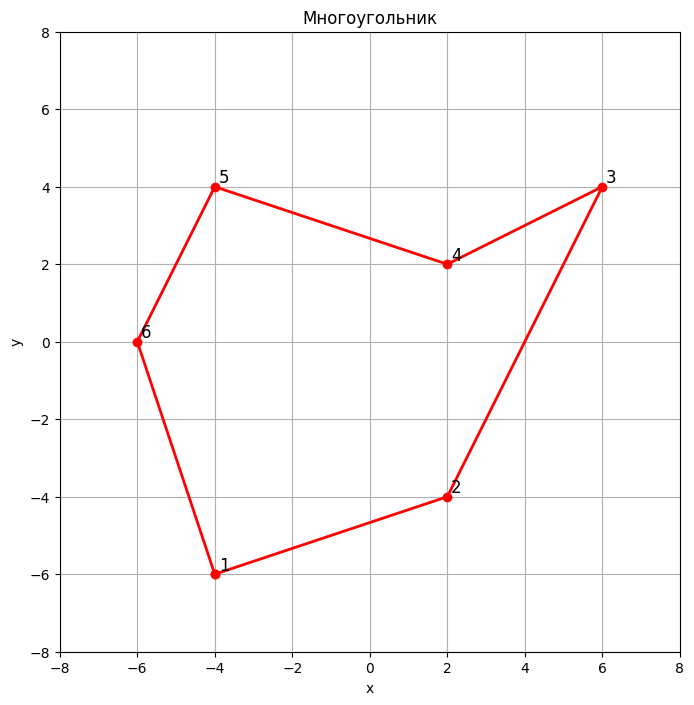

In [4]:
def Grad():
    vertices=np.array([[-4,-6],[2,-4],[6,4],[2,2],[-4,4],[-6,0]])
    vertices = np.vstack((vertices, vertices[0]))
    fig=plt.figure(figsize=(8,9))
    ax = fig.add_subplot(1, 1, 1)
    x=vertices[:,0]
    y=vertices[:,1]
    ax.plot(x,y, marker='o',  color='r',  linewidth=2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Многоугольник')
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)
    for i in range(len(x) -1):
      ax.text(x[i] + 0.1, y[i] + 0.1, str(i+1), fontsize=12)
    plt.show()

Grad()


    


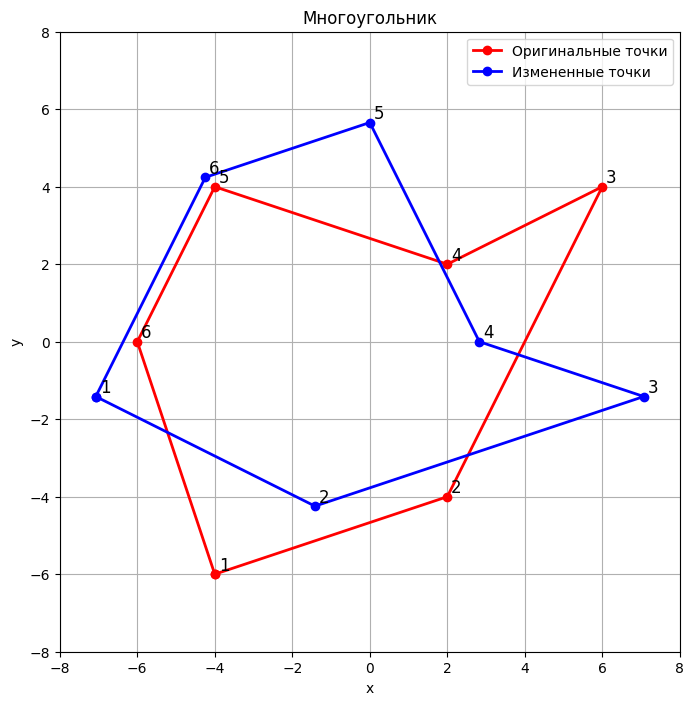

In [5]:

def Rotation(vertices,angle):
    angle_rad=np.radians(angle)
    rot_cos=np.cos(angle_rad)
    rot_sin=np.sin(angle_rad)
    matrix=np.array([[rot_cos,-rot_sin],[rot_sin, rot_cos]])
    rot_vertices=np.dot(vertices,matrix)
    return(rot_vertices)
def Grad(angle):
    vertices=np.array([[-4,-6],[2,-4],[6,4],[2,2],[-4,4],[-6,0]])
    vertices = np.vstack((vertices, vertices[0]))
    rot_vertices=Rotation(vertices,angle)
    fig=plt.figure(figsize=(8,9))
    ax = fig.add_subplot(1, 1, 1)
    x=vertices[:,0]
    y=vertices[:,1]
    x_rot=rot_vertices[:,0]
    y_rot=rot_vertices[:,1]
    ax.plot(x,y, marker='o', color='r',  linewidth=2, label='Оригинальные точки')
    ax.plot(x_rot,y_rot, marker='o', color='b', linewidth=2,label='Измененные точки')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Многоугольник')
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend()
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)
    for i in range(len(x) -1):
      ax.text(x[i] + 0.1, y[i] + 0.1, str(i+1), fontsize=12)

    for i in range(len(x_rot) -1):
        ax.text(x_rot[i] +0.1, y_rot[i] +0.1, str(i+1), fontsize=12)
    plt.show()
Grad(45)


In [6]:
def Rotation(vertices,angle):
    angle_rad=np.radians(-angle)
    rot_cos=np.cos(angle_rad)
    rot_sin=np.sin(angle_rad)
    matrix=np.array([[rot_cos,-rot_sin],[rot_sin, rot_cos]])
    rot_vertices=np.dot(vertices,matrix)
    return(rot_vertices)
def Grad(angle):
    vertices=np.array([[-4,-6],[2,-4],[6,4],[2,2],[-4,4],[-6,0]])
    vertices = np.vstack((vertices, vertices[0]))
    rot_vertices=Rotation(vertices,angle)
    fig=plt.figure(figsize=(8,9))
    ax = fig.add_subplot(1, 1, 1)
    x_rot=rot_vertices[:,0]
    y_rot=rot_vertices[:,1]
    ax.plot(x_rot,y_rot, marker='o', color='b', linewidth=2,label='Измененные точки')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Многоугольник')
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend()
    ax.set_xlim(-8,8)
    ax.set_ylim(-8,8)
    for i in range(len(x_rot) -1):
        ax.text(x_rot[i] +0.1, y_rot[i] +0.1, str(i+1), fontsize=12)
    plt.show()

slider = widgets.FloatSlider(
    value=0,  
    min=0,    
    max=360,    
    step=0.01,
    description='t',  
)

widgets.interactive(Grad, angle=slider)

interactive(children=(FloatSlider(value=0.0, description='t', max=360.0, step=0.01), Output()), _dom_classes=(…

In [11]:
def Rotationist(vertices,angle,x,y):
    a=np.radians(angle)
    matrix=np.array([[np.cos(a),-np.sin(a)],[np.sin(a), np.cos(a)]])
    center=np.array([x,y])
    vertices_2=vertices-center
    rot_vertices=np.dot(vertices_2,matrix)
    vertices2=rot_vertices+center
    return(vertices2)
def Gradist(angle,x,y):
    vertices=np.array([[-4,-6],[2,-4],[6,4],[2,2],[-4,4],[-6,0]])
    vertices = np.vstack((vertices, vertices[0]))
    vertices2=Rotationist(vertices,angle,x,y)
    center = np.array([[x,y]])
    fig=plt.figure(figsize=(10,10),dpi=200)
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(x,y,marker='o',color='black',markersize=6,label='Центр')
    x_rot=vertices2[:,0]
    y_rot=vertices2[:,1]
    ax.plot(x_rot,y_rot, marker='o', color='b', linewidth=2,label='Измененные точки')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Многоугольник')
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    a = np.radians(angle)
    for i in range(len(x_rot) -1):
        ax.text(x_rot[i] +0.1, y_rot[i] +0.1, str(i+1), fontsize=12)
    r1= 2*np.linalg.norm(vertices[0]-center[0])
    r2= 2*np.linalg.norm(vertices[3]-center[0])
    arc1 = patches.Arc((x,y), r1, r1 , theta1=np.rad2deg(np.arctan2(vertices[0,1]-y,vertices[0,0]-x)), theta2=np.rad2deg(np.arctan2(vertices[0,1]-y,vertices[0,0]-x)+a))
    arc2 = patches.Arc((x,y), r2, r2 , theta1=np.rad2deg(np.arctan2(vertices[3,1]-y,vertices[3,0]-x)), theta2=np.rad2deg(np.arctan2(vertices[3,1]-y,vertices[3,0]-x)+a))
    ax.add_patch(arc1)
    ax.add_patch(arc2)
    plt.show()
slider = widgets.FloatSlider(
    value=0,  
    min=0,    
    max=360,    
    step=0.01,
    description='t',  
)


widgets.interactive(Gradist, angle=slider,x=(-8,8,1),y=(-8,8,1))

interactive(children=(FloatSlider(value=0.0, description='t', max=360.0, step=0.01), IntSlider(value=0, descri…

1. Нарисуйте неправильный треугольник задав координаты его вершин массивом NumPy.
2. С помощью матрицы для двумерных отражений
𝑅𝑓
(𝜃) = (
cos 𝜃
sin 𝜃
sin 𝜃
− cos 𝜃
)
отразите треугольник относительно прямой 𝑙1
, проходящей через начало координат
под углом 30
°
. Объясните геометрический смысл параметра 𝜃 матрицы 𝑅𝑓
(𝜃). На кар
тинке должен отображаться треугольник как в исходном положении, так и в конечном
(после отражения).
3. Создать ползунок, с помощью которого можно будет регулировать угол наклона прямой
относительно оси 𝑂𝑥. Треугольник при этом должен всякий раз отражаться относи
тельно нового положения прямой.
4. Добавьте на рисунок вторую прямую 𝑙2
, которая также проходит через центр координат
под заданным углом. Отразите треугольник сначала относительно 𝑙1
, а затем результат
отражения относительно 𝑙2
. То есть должна получиться последовательность:

In [8]:
def Rotationy(vertices,angle):
    angle_rad=np.radians(angle*2)
    rot_cos=np.cos(angle_rad)
    rot_sin=np.sin(angle_rad)
    matrix=(np.array([[rot_cos,rot_sin],[rot_sin, -rot_cos]]))
    rot_vertices=np.dot(vertices,matrix)
    return(rot_vertices)
def Grady(angle1=0,angle2=0):
    fig=plt.figure(figsize=(10,10),dpi=200)
    ax = fig.add_subplot(1, 1, 1)
    vertices=np.array([[-7,5],[-4,7],[-1,4]])
    rot_vertices=Rotationy(vertices,angle1)
    perevorot_vertices=Rotationy(rot_vertices,angle2)
    x=vertices[:,0]
    y=vertices[:,1]
    x_rot=rot_vertices[:,0]
    y_rot=rot_vertices[:,1]
    x_perevorot=perevorot_vertices[:,0]
    y_perevorot=perevorot_vertices[:,1]
    triangle1 = patches.Polygon(vertices, closed=True, fill=False, edgecolor='black')
    triangle2 = patches.Polygon(rot_vertices, closed=True, fill=False, edgecolor='black')
    triangle3 = patches.Polygon(perevorot_vertices, closed=True, fill=False, edgecolor='black')
    ax.axline((0,0), slope = (np.sin(np.radians(angle1))/np.cos(np.radians(angle1))), linewidth = 1, color = "green")
    ax.axline((0,0), slope = (np.sin(np.radians(angle2))/np.cos(np.radians(angle2))), linewidth = 1, color = "red")
    ax.add_patch(triangle1)
    ax.add_patch(triangle2)
    ax.add_patch(triangle3)
    ax.set_xlabel('x')
    ax.set_ylabel('y') 
    for i in range(len(x) ):
      ax.text(x[i] + 0.1, y[i] + 0.1, str(i+1), fontsize=12)

    for i in range(len(x_rot) ):
        ax.text(x_rot[i] +0.1, y_rot[i] +0.1, str(i+1), fontsize=12)
    for i in range(len(x_perevorot) ):
        ax.text(x_perevorot[i] +0.1, y_perevorot[i] +0.1, str(i+1), fontsize=12)    
    ax.grid(True)
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    plt.show()

widgets.interactive(Grady, angle1=(0,180,1),angle2=(0,180,1))

interactive(children=(IntSlider(value=0, description='angle1', max=180), IntSlider(value=0, description='angle…

# Задание №3
Повторите задания 1 и 2 с использованием комплексных чисел вместо матриц.
1. Задайте некоторое комплексное число 𝑢 = exp(𝑖𝜃), а координаты точки в виде числа
𝑝 = 𝑥 + 𝑖𝑦. Для вращения точки следует произвести умножение 𝑢𝑝, а для отражения —
умножение 𝑢𝑝, где ̅ 𝑝̅= 𝑥 − 𝑖𝑦 — комплексное сопряжение.
2. Библиотека Matplotlib не умеет отображать точки, заданные комплексными числами,
хотя данный тип чисел встроен в язык Python. Набор координат в виде комплексных
чисел можно задать с помощью массива, например так:
P = np.array([1+1.1j, 2+3j])
а затем извлечь действительную (координаты 𝑥) и мнимую (координаты 𝑦) части с
помощью следующих функций:
X = np.real(Ps)
Y = np.imag(Ps)
3. В чем, на ваш взгляд, преимущество использования комплексных чисел по сравнению
с двумерными векторами?

In [9]:
def grafic(angle=0):
    fig = plt.figure(num=1, figsize=(3, 3), dpi=200)
    ax = fig.add_subplot(1, 1, 1)
    ax.grid(visible=True, color='grey', lw=0.5, ls='--')
    ax.set(
    xlim=(-10, 30),
    ylim=(-10, 30)
    )
    vertices = np.array([-4-6j,2-4j,6+4j,2+2j,-4+4j,-6+0j])
    center = 6+6j
    a = np.radians(angle)
    u = np.exp(complex(0,a))
    ax.plot(np.real(center), np.imag(center), 'ko', markersize = 3)
    translated_vertices = vertices - center
    rotated_vertices = u*translated_vertices
    final_vertices = rotated_vertices + center
    polygon = patches.Polygon(np.array([np.real(final_vertices), np.imag(final_vertices)]).T, closed=True, fill=False, edgecolor='black')
    r1= abs(vertices[0]-center)
    r2= abs(vertices[3]-center)
    arc1 = patches.Arc((np.real(center),np.imag(center)), r1*2, r1*2 , theta1=np.rad2deg(np.arctan2(np.imag(vertices[0])-np.imag(center),np.real(vertices[0])-np.real(center))), theta2=np.rad2deg(np.arctan2(np.imag(vertices[0])-np.imag(center),np.real(vertices[0])-np.real(center))+a))
    arc2 = patches.Arc((np.real(center),np.imag(center)), r2*2, r2*2 , theta1=np.rad2deg(np.arctan2(np.imag(vertices[3])-np.imag(center),np.real(vertices[3])-np.real(center))), theta2=np.rad2deg(np.arctan2(np.imag(vertices[3])-np.imag(center),np.real(vertices[3])-np.real(center))+a))
    ax.add_patch(polygon)
    ax.add_patch(arc1)
    ax.add_patch(arc2)
widgets.interact(grafic, angle=(0, 359, 1))

interactive(children=(IntSlider(value=0, description='angle', max=359), Output()), _dom_classes=('widget-inter…

<function __main__.grafic(angle=0)>

In [10]:
def Rotationy(vertices,angle):
    angle_rad=np.radians(angle*2)
    u=np.exp(complex(0,angle_rad))#Создает комплексное число u, которое представляет собой поворот на угол angle_rad в комплексной плоскости. Это можно интерпретировать как cos(angle_rad) + j*sin(angle_rad).
    rot_vertices=np.array(u*np.conjugate(vertices))#Берет комплексно сопряженное каждой вершины.  Комплексное сопряжение соответствует отражению относительно действительной оси (оси x).
    return(rot_vertices)
def Gradys(angle1=0,angle2=0):
    fig=plt.figure(figsize=(10,10),dpi=200)
    ax = fig.add_subplot(1, 1, 1)
    vertices=np.array([-7+5j,-4+7j,-1+4j])
    rot_vertices=Rotationy(vertices,angle1)
    perevorot_vertices=Rotationy(rot_vertices,angle2)
    triangle1 = patches.Polygon(np.array([np.real(vertices), np.imag(vertices)]).T, closed=True, fill=False, edgecolor='black')
    triangle2 = patches.Polygon(np.array([np.real(rot_vertices), np.imag(rot_vertices)]).T, closed=True, fill=False, edgecolor='black')
    triangle3 = patches.Polygon(np.array([np.real( perevorot_vertices), np.imag( perevorot_vertices)]).T, closed=True, fill=False, edgecolor='black')
    ax.axline((0,0), slope = (np.sin(np.radians(angle1))/np.cos(np.radians(angle1))), linewidth = 1, color = "green")
    ax.axline((0,0), slope = (np.sin(np.radians(angle2))/np.cos(np.radians(angle2))), linewidth = 1, color = "red")
    ax.add_patch(triangle1)
    ax.add_patch(triangle2)
    ax.add_patch(triangle3)
    ax.set_xlabel('x')
    ax.set_ylabel('y')    
    ax.grid(True)
    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    plt.show()

widgets.interactive(Gradys, angle1=(0,180,1),angle2=(0,180,1))

interactive(children=(IntSlider(value=0, description='angle1', max=180), IntSlider(value=0, description='angle…